In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from structdbrest import StructDBLightRester

In [3]:
RESTAPI_TOKEN='XXXX' # ACCESS TOKEN GOES HERE

In [4]:
rest = StructDBLightRester(token = RESTAPI_TOKEN)

Query the FHi-aims calculator

In [5]:
fhi_calc = rest.query_calculator_types(calculator_name="FHI%")[0]
fhi_calc

Querying...done
Response successful, size = 7.20 kB, time = 0.23 s
1  entries received


<CalculatorType #523:FHI-aims/PBE/tight>

# E-V curve (Murnaghan)

Query all murnaghan properties computed with FHI-aims calculator

In [6]:
fhi_murn_properties = rest.query_properties(rest.PropertyTypes.MURNAGHAN, calculator_name=fhi_calc.NAME)
fhi_murn_properties 

Querying...done
Response successful, size = 153.77 kB, time = 1.25 s
7  entries received


[<Property #2192586:murnaghan:Cu-1:A1:FHI-aims/PBE/tight:murnaghan>,
 <Property #2192842:murnaghan:Cu-1:A2:FHI-aims/PBE/tight:murnaghan>,
 <Property #2192874:murnaghan:Cu-2:A3:FHI-aims/PBE/tight:murnaghan>,
 <Property #2192920:murnaghan:Cu-4:A3p:FHI-aims/PBE/tight:murnaghan>,
 <Property #2192967:murnaghan:Cu-2:A4:FHI-aims/PBE/tight:murnaghan>,
 <Property #2193001:murnaghan:Cu-1:A_h:FHI-aims/PBE/tight:murnaghan>,
 <Property #2193035:murnaghan:Cu-1:A_f:FHI-aims/PBE/tight:murnaghan>]

Query murnaghan property computed with FHI-aims calculator for copper in A1 (fcc) crystallographic prototypes

In [7]:
Cu_fcc_murn_prop = rest.query_properties(rest.PropertyTypes.MURNAGHAN, calculator_name=fhi_calc.NAME,
                                         composition="Cu-%", strukturbericht="A1"                                         
                                    )
Cu_fcc_murn_prop=Cu_fcc_murn_prop[0]
Cu_fcc_murn_prop

Querying...done
Response successful, size = 0.16 kB, time = 0.25 s
1  entries received


<Property #2192586:murnaghan:Cu-1:A1:FHI-aims/PBE/tight:murnaghan>

Property data:

In [8]:
Cu_fcc_murn_prop.VALUE

{'energy': [-45246.0899631628,
  -45246.1151609274,
  -45246.1335518575,
  -45246.1459111637,
  -45246.1529285425,
  -45246.1552111184,
  -45246.1533020932,
  -45246.1476776391,
  -45246.1387638882,
  -45246.1269363688,
  -45246.1125347503],
 'equilibrium_b_prime': 5.037561620377319,
 'equilibrium_bulk_modulus': 144.20691964709485,
 'equilibrium_energy': -45246.15539869882,
 'equilibrium_volume': 11.970484432962996,
 'volume': [10.768936749113328,
  11.00826214050653,
  11.247558712727146,
  11.486872728667258,
  11.726182093796062,
  11.965489834841975,
  12.204805349648002,
  12.444124062082892,
  12.683426075890331,
  12.922737295628943,
  13.162047685810071]}

Text(0, 0.5, 'E, eV')

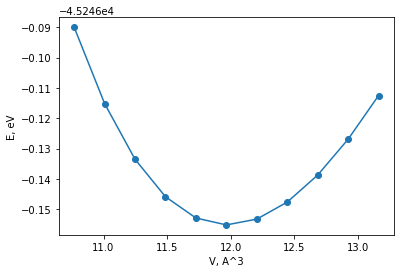

In [9]:
plt.plot(Cu_fcc_murn_prop.VALUE["volume"], Cu_fcc_murn_prop.VALUE["energy"], "o-")
plt.xlabel("V, A^3")
plt.ylabel("E, eV")

Corresponding structure for this property:

In [10]:
Cu_fcc_murn_prop.ORIGINAL_STRUCTURE

<StructureEntry #2056410:Cu-1>

Convert is to ASE atoms:

In [11]:
Cu_fcc_murn_prop.ORIGINAL_STRUCTURE.get_atoms()

Atoms(symbols='Cu', pbc=True, cell=[[0.0, 1.8156295545655798, 1.8156295545655798], [1.8156295545655798, 0.0, 1.8156295545655798], [1.8156295545655798, 1.8156295545655798, 0.0]])

Check to corresponding subproperties of the Murnaghan property:

In [12]:
Cu_fcc_murn_prop.CHILDREN

{'strain_0_9': <Property #2192587:static:Cu-1:A1:FHI-aims/PBE/tight:murnaghan:strain_0_9>,
 'strain_0_92': <Property #2192588:static:Cu-1:A1:FHI-aims/PBE/tight:murnaghan:strain_0_92>,
 'strain_0_94': <Property #2192589:static:Cu-1:A1:FHI-aims/PBE/tight:murnaghan:strain_0_94>,
 'strain_0_96': <Property #2192590:static:Cu-1:A1:FHI-aims/PBE/tight:murnaghan:strain_0_96>,
 'strain_0_98': <Property #2192591:static:Cu-1:A1:FHI-aims/PBE/tight:murnaghan:strain_0_98>,
 'strain_1_0': <Property #2192592:static:Cu-1:A1:FHI-aims/PBE/tight:murnaghan:strain_1_0>,
 'strain_1_02': <Property #2192593:static:Cu-1:A1:FHI-aims/PBE/tight:murnaghan:strain_1_02>,
 'strain_1_04': <Property #2192594:static:Cu-1:A1:FHI-aims/PBE/tight:murnaghan:strain_1_04>,
 'strain_1_06': <Property #2192595:static:Cu-1:A1:FHI-aims/PBE/tight:murnaghan:strain_1_06>,
 'strain_1_08': <Property #2192596:static:Cu-1:A1:FHI-aims/PBE/tight:murnaghan:strain_1_08>,
 'strain_1_1': <Property #2192597:static:Cu-1:A1:FHI-aims/PBE/tight:murnag

In [13]:
Cu_fcc_murn_prop.CHILDREN["strain_0_9"].VALUE

{'energy': -45246.0899631628,
 'energy_corrected': -45246.0893274806,
 'energy_uncorrected': -45246.0886917984,
 'forces': [[0.0, 0.0, 0.0]],
 'free_energy': -45246.0899631628,
 'n_atom': 1,
 'pressure': 0.12069361,
 'volume': 10.768936749113328}

In [14]:
Cu_fcc_murn_prop.CHILDREN["strain_0_9"].ORIGINAL_STRUCTURE.get_atoms().cell

Cell([[0.0, 1.752727, 1.752727], [1.752727, 0.0, 1.752727], [1.752727, 1.752727, 0.0]])

In [15]:
Cu_fcc_murn_prop.CHILDREN["strain_1_1"].ORIGINAL_STRUCTURE.get_atoms().cell

Cell([[0.0, 1.873978, 1.873978], [1.873978, 0.0, 1.873978], [1.873978, 1.873978, 0.0]])

# Elastic matrix

In [16]:
rest.query_properties(rest.PropertyTypes.ELASTIC_MATRIX, composition="Cu-%", calculator_name=fhi_calc.NAME)

Querying...done
Response successful, size = 334.03 kB, time = 1.97 s
7  entries received


[<Property #2192598:elastic_matrix:Cu-1:A1:FHI-aims/PBE/tight:elastic>,
 <Property #2192854:elastic_matrix:Cu-1:A2:FHI-aims/PBE/tight:elastic>,
 <Property #2192886:elastic_matrix:Cu-2:A3:FHI-aims/PBE/tight:elastic>,
 <Property #2192932:elastic_matrix:Cu-4:A3p:FHI-aims/PBE/tight:elastic>,
 <Property #2192979:elastic_matrix:Cu-2:A4:FHI-aims/PBE/tight:elastic>,
 <Property #2193013:elastic_matrix:Cu-1:A_h:FHI-aims/PBE/tight:elastic>,
 <Property #2193047:elastic_matrix:Cu-1:A_f:FHI-aims/PBE/tight:elastic>]

In [17]:
Cu_fcc_elastic_prop = rest.query_properties(rest.PropertyTypes.ELASTIC_MATRIX, 
                                            composition="Cu-%", 
                                            calculator_name=fhi_calc.NAME,
                                            strukturbericht="A1"
                                           )[0]
Cu_fcc_elastic_prop

Querying...done
Response successful, size = 0.16 kB, time = 0.34 s
1  entries received


<Property #2192598:elastic_matrix:Cu-1:A1:FHI-aims/PBE/tight:elastic>

Elastic matrix for fcc-Cu computed with FHI-aims

In [18]:
Cu_fcc_elastic_prop.VALUE["C"]

[[176.9053561546803, 131.65386178545305, 131.65386178545305, 0.0, 0.0, 0.0],
 [131.65386178545305, 176.9053561546803, 131.65386178545305, 0.0, 0.0, 0.0],
 [131.65386178545305, 131.65386178545305, 176.9053561546803, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 82.46735842027694, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 82.46735842027694, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 82.46735842027694]]

# Phonons

In [19]:
rest.query_properties(rest.PropertyTypes.PHONONS, composition="Cu-%", calculator_name=fhi_calc.NAME)

Querying...done
Response successful, size = 297.30 kB, time = 0.72 s
10  entries received


[<Property #2192644:phonons:Cu-1:A1:FHI-aims/PBE/tight:phonon>,
 <Property #2192918:phonons:Cu-2:A3:FHI-aims/PBE/tight:phonon>,
 <Property #2192964:phonons:Cu-4:A3p:FHI-aims/PBE/tight:phonon>,
 <Property #2192999:phonons:Cu-2:A4:FHI-aims/PBE/tight:phonon>,
 <Property #2193033:phonons:Cu-1:A_h:FHI-aims/PBE/tight:phonon>,
 <Property #2193079:phonons:Cu-1:A_f:FHI-aims/PBE/tight:phonon>,
 <Property #2193081:phonons:Cu-1:A2:FHI-aims/PBE/tight:phonon>,
 <Property #2214066:phonons:Cu-1:hex_2d:FHI-aims/PBE/tight:phonon:sc_331>,
 <Property #2214068:phonons:Cu-1:hex_2d:FHI-aims/PBE/tight:phonon:sc_551>,
 <Property #2214071:phonons:Cu-2:bSQ_2d:FHI-aims/PBE/tight:phonon:sc_441>]

In [20]:
Cu_fcc_phonon_prop = rest.query_properties(rest.PropertyTypes.PHONONS, 
                                            composition="Cu-%", 
                                            calculator_name=fhi_calc.NAME,
                                            strukturbericht="A1"
                                           )[0]
Cu_fcc_phonon_prop

Querying...done
Response successful, size = 0.16 kB, time = 0.18 s
1  entries received


<Property #2192644:phonons:Cu-1:A1:FHI-aims/PBE/tight:phonon>

Text(0, 0.5, 'Ph. DOS, 1/THz')

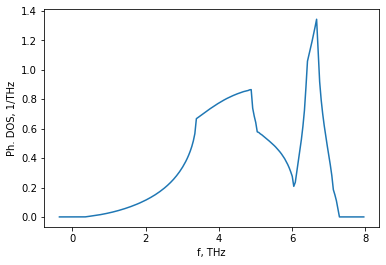

In [21]:
plt.plot(Cu_fcc_phonon_prop.VALUE["dos_energies"],Cu_fcc_phonon_prop.VALUE["dos_total"])
plt.xlabel("f, THz")
plt.ylabel("Ph. DOS, 1/THz")

# Vacancy computed with VASP

In [22]:
vasp_calc = rest.query_calculator_types("VASP.5.4/500/kdens 0.1/SP/PBE")[0]

Querying...done
Response successful, size = 0.35 kB, time = 0.13 s
1  entries received


In [23]:
rest.query_properties(rest.PropertyTypes.DEFECT, composition="Cu-%", calculator_name=vasp_calc.NAME)

Querying...done
Response successful, size = 376.27 kB, time = 1.13 s
11  entries received


[<Property #146177:defect:Cu-1:A6:VASP.5.4/500/kdens 0.1/SP/PBE>,
 <Property #146582:defect:Cu-1:A_a:VASP.5.4/500/kdens 0.1/SP/PBE>,
 <Property #146595:defect:Cu-1:A1:VASP.5.4/500/kdens 0.1/SP/PBE>,
 <Property #159146:defect:Cu-1:A10:VASP.5.4/500/kdens 0.1/SP/PBE>,
 <Property #159151:defect:Cu-1:A2:VASP.5.4/500/kdens 0.1/SP/PBE>,
 <Property #159156:defect:Cu-2:A4:VASP.5.4/500/kdens 0.1/SP/PBE>,
 <Property #172897:defect:Cu-4:A9:VASP.5.4/500/kdens 0.1/SP/PBE>,
 <Property #899532:defect:Cu-1:A2_gen_252:VASP.5.4/500/kdens 0.1/SP/PBE:defect_formation_kpt_recalc:kpt_recalc>,
 <Property #900301:defect:Cu-1:A_h_gen_257:VASP.5.4/500/kdens 0.1/SP/PBE:defect_formation_kpt_recalc:kpt_recalc>,
 <Property #900474:defect:Cu-2:A4_gen_64:VASP.5.4/500/kdens 0.1/SP/PBE:defect_formation_kpt_recalc:kpt_recalc>,
 <Property #905434:defect:Cu-3:C19_gen_245:VASP.5.4/500/kdens 0.1/SP/PBE:defect_formation_kpt_recalc:kpt_recalc>]

In [24]:
Cu_fcc_vac_prop = rest.query_properties(rest.PropertyTypes.DEFECT, 
                                            composition="Cu-%", 
                                            calculator_name=vasp_calc.NAME,
                                            strukturbericht="A1"
                                           )[0]
Cu_fcc_vac_prop

Querying...done
Response successful, size = 0.16 kB, time = 0.22 s
1  entries received


<Property #146595:defect:Cu-1:A1:VASP.5.4/500/kdens 0.1/SP/PBE>

In [25]:
Cu_fcc_vac_prop.VALUE

{'energies': {'supercell_0': -238.61130333,
  'supercell_defect_wyck_a_atomic': -233.81732152,
  'supercell_defect_wyck_a_static': -233.78831972,
  'supercell_defect_wyck_a_total': -233.83152967},
 'n': 64,
 'reference_energies': {'Cu': -0.23622365110083798},
 'supercell_range': [4, 4, 4],
 'vacancy_formation_energy': {'a_atomic': 1.0656801954687296,
  'a_static': 1.0946819954687328,
  'a_total': 1.0514720454687279},
 'vacancy_formation_volume': {'a_total': -5.115335706123801},
 'volumes': {'supercell_0': 768.3863517970179,
  'supercell_defect_wyck_a_atomic': 768.3863517970179,
  'supercell_defect_wyck_a_static': 768.3863517970179,
  'supercell_defect_wyck_a_total': 763.2710160908941},
 'wyckoff_unique_indices': {'a': 0}}

In [26]:
Cu_fcc_vac_prop.VALUE["vacancy_formation_energy"]

{'a_atomic': 1.0656801954687296,
 'a_static': 1.0946819954687328,
 'a_total': 1.0514720454687279}

# Surface energies for Cu computed with FHI-aims

In [27]:
Cu_surf_props = rest.query_properties(rest.PropertyTypes.SURFACE_ENERGY, 
                      calculator_name=fhi_calc.NAME,
                      composition="Cu-%"
                     )

Querying...done
Response successful, size = 35.88 kB, time = 0.47 s
9  entries received


In [28]:
surf_prop = Cu_surf_props[0]

surf_prop

<Property #2192646:surface_energy:Cu-1:fcc_100surf_X100_Y010_Z001_10at:A1:FHI-aims/PBE/tight:surface_energy>

In [29]:
surf_prop.NAME

'fcc_100surf_X100_Y010_Z001_10at:A1:FHI-aims/PBE/tight:surface_energy'

In [30]:
surf_prop.VALUE

{'number_of_atoms': 10,
 'ref_renergy_per_atom': -45246.15539869882,
 'surface_area': 13.186042723957991,
 'surface_energy': 0.09258575788503419,
 'surface_orientation': '100',
 'surface_structure_energy': -452459.11230747}

related properties, that were used for surface energy calculations

In [31]:
surf_prop.CHILDREN

{'reference_energy_property': <Property #2192586:murnaghan:Cu-1:A1:FHI-aims/PBE/tight:murnaghan>,
 'surface_energy_property': <Property #2192647:static:Cu-10:fcc_100surf_X100_Y010_Z001_10at:A1:FHI-aims/PBE/tight:surface_energy:surface_energy_static_property>}